In [1]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("data/weather.csv")

In [3]:
all_df=all_df.drop(['RISK_MM'], axis=1)

In [4]:
X=all_df.drop(['RainTomorrow'], axis=1).values.astype('float64')

In [5]:
Y = all_df['RainTomorrow'].values.astype('int64')

In [6]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

95672

In [7]:
test_Features[:2]

array([[-0.28057235, -0.88540995, -0.15604664,  0.58549966,  0.29969181,
         0.56686938,  0.71671696,  0.24811193, -0.16280797,  0.27738035,
        -0.47846775, -0.9189042 , -0.53271769],
       [ 0.74023477, -0.34150784, -0.274179  ,  0.43712836,  1.89126836,
         1.3737581 , -0.06742478,  1.02136889, -0.43047181, -0.40644069,
         0.40533611, -0.21640785, -0.53271769]])

In [8]:
train_Label[:4]

array([1, 1, 0, 1])

In [9]:
train_Features.shape

(95672, 13)

In [10]:
test_Label[:4]

array([1, 0, 0, 0])

In [11]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [12]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [13]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [14]:
model = Sequential()

In [15]:
model.add(LSTM(units=13, input_shape=(13,1)))

In [16]:
model.add(Dense(1, activation = "sigmoid"))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 13)                780       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 14        
Total params: 794
Trainable params: 794
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [19]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 86104 samples, validate on 9568 samples
Epoch 1/30
86104/86104 [==============================] - 5s 55us/step - loss: 0.6096 - acc: 0.7352 - val_loss: 0.5118 - val_acc: 0.7816
Epoch 2/30
86104/86104 [==============================] - 9s 99us/step - loss: 0.4991 - acc: 0.7857 - val_loss: 0.5001 - val_acc: 0.7829
Epoch 3/30
86104/86104 [==============================] - 12s 137us/step - loss: 0.4889 - acc: 0.7873 - val_loss: 0.4910 - val_acc: 0.7848
Epoch 4/30
86104/86104 [==============================] - 11s 124us/step - loss: 0.4803 - acc: 0.7883 - val_loss: 0.4819 - val_acc: 0.7852
Epoch 5/30
86104/86104 [==============================] - 11s 130us/step - loss: 0.4706 - acc: 0.7884 - val_loss: 0.4714 - val_acc: 0.7847
Epoch 6/30
86104/86104 [==============================] - 11s 127us/step - loss: 0.4589 - acc: 0.7877 - val_loss: 0.4597 - val_acc: 0.7849
Epoch 7/30
86104/86104 [==============================] - 11s 129us/step - loss: 0.4469 - acc: 0.7880 - val_loss: 0.4488 

In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

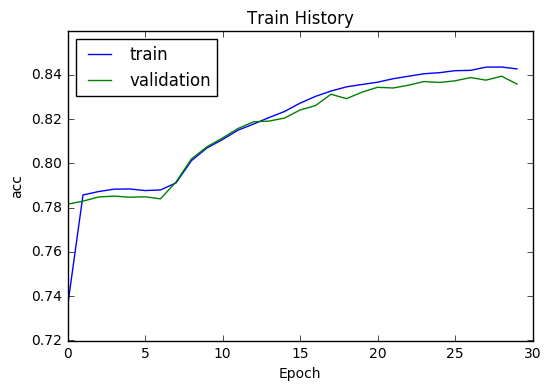

In [21]:
show_train_history(train_history,'acc','val_acc')

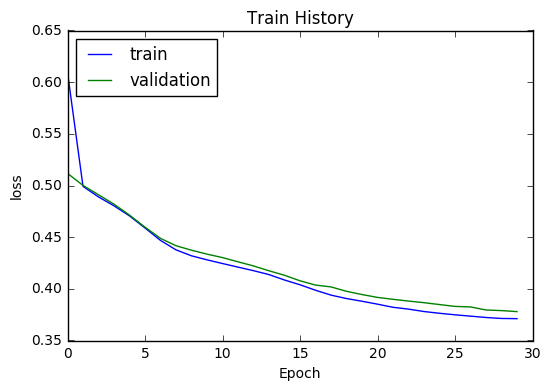

In [22]:
show_train_history(train_history,'loss','val_loss')

In [23]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

23918/23918 [==============================] - 2s 102us/step


In [24]:
scores[1]

0.8424617442930011